In [20]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras._tf_keras.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [21]:
#setting
tflite_model_name = 'nhung_model_tf'  # Will be given .tflite suffix
c_model_name = 'nhung_model'

In [22]:
# Load the data
data = pd.read_csv('C://Users//84946//OneDrive//Desktop//Documents_PTIT//HK2_nam4//Lap_trinh_nhung//project//Data//data.csv')

In [23]:
# Calculate the mean of each column
mean_temperature = data['Temperature'].mean()
mean_humidity = data['Humidity'].mean()
mean_soil_moisture = data['SoilMoisture'].mean()

# Display the mean values
print("Mean of data.csv:")
print(f"Temperature: {mean_temperature:.2f}")
print(f"Humidity: {mean_humidity:.2f}")
print(f"SoilMoisture: {mean_soil_moisture:.2f}")

std_temperature = data['Temperature'].std()
std_humidity = data['Humidity'].std()
std_soil_moisture = data['SoilMoisture'].std()

print("Standard Deviation of data.csv:")
print(f"Temperature: {std_temperature:.2f}")
print(f"Humidity: {std_humidity:.2f}")
print(f"SoilMoisture: {std_soil_moisture:.2f}")

Mean of data.csv:
Temperature: 30.34
Humidity: 61.99
SoilMoisture: 2712.95
Standard Deviation of data.csv:
Temperature: 0.58
Humidity: 5.24
SoilMoisture: 179.15


In [24]:
# Convert the 'Time' column to datetime
data['Time'] = pd.to_datetime(data['Time'])

# Sort data by time to ensure proper sequencing
data = data.sort_values(by='Time')

# Ensure all data is numeric and handle missing values
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna()

# Normalize the data
scaler = StandardScaler()
data[['Temperature', 'Humidity', 'SoilMoisture']] = scaler.fit_transform(data[['Temperature', 'Humidity', 'SoilMoisture']])


In [25]:
# Function to create time series sequences
def create_sequences(data, time_steps=3):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i + time_steps][['Temperature', 'Humidity', 'SoilMoisture']].values)
        y.append(data.iloc[i + time_steps][['Temperature', 'Humidity', 'SoilMoisture']].values)
    return np.array(X), np.array(y)

In [26]:
# Create sequences
time_steps = 3  # Number of time steps
X, y = create_sequences(data, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Conv1D model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(time_steps, 3)),
    
    # First Conv1D block
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    # Second Conv1D block
    tf.keras.layers.Conv1D(128, kernel_size=5, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    # Third Conv1D block
    tf.keras.layers.Conv1D(256, kernel_size=7, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    # Global Average Pooling
    tf.keras.layers.GlobalAveragePooling1D(),
    
    # Dense layers
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(3)
])
# Custom optimizer with learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Training with early stopping
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 2.3058 - mae: 1.1779 - val_loss: 0.8087 - val_mae: 0.7565
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9954 - mae: 0.7750 - val_loss: 0.7666 - val_mae: 0.7335
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9180 - mae: 0.7382 - val_loss: 0.7084 - val_mae: 0.6977
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7945 - mae: 0.6943 - val_loss: 0.6476 - val_mae: 0.6606
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7143 - mae: 0.6446 - val_loss: 0.5956 - val_mae: 0.6169
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6335 - mae: 0.6037 - val_loss: 0.5519 - val_mae: 0.5954
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6059 - mae: 0.6070 - val_loss: 0.5371 - val_mae: 0.5793
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6065 - mae: 0.5986 - val_loss: 0.4700 - val_mae: 0.5420
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - los

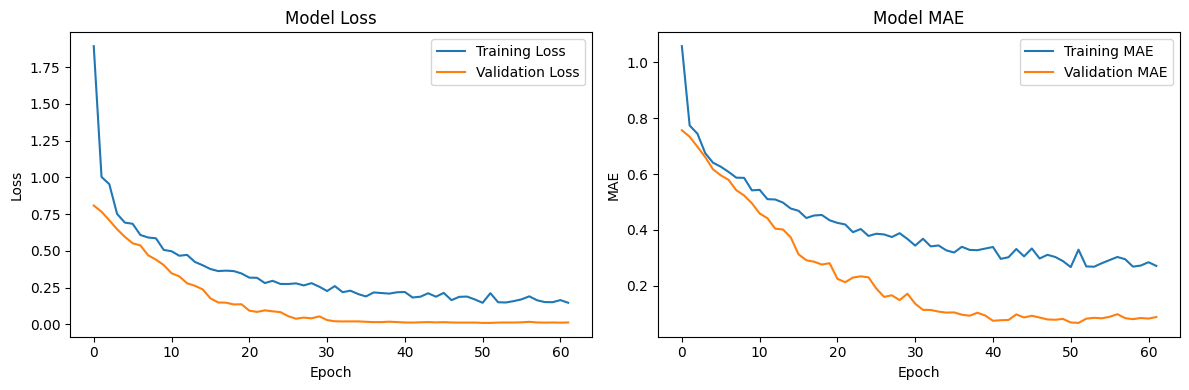

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0122 - mae: 0.0699

Test Loss: 0.0150
Test MAE: 0.0731


In [27]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

In [28]:
from sklearn.metrics import r2_score, mean_squared_error
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics for each feature
features = ['Temperature', 'Humidity', 'Soil Moisture']
metrics = {}

for i, feature in enumerate(features):
    r2 = r2_score(y_test[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test[:, i], y_pred[:, i]))
    mae = np.mean(np.abs(y_test[:, i] - y_pred[:, i]))
    
    metrics[feature] = {
        'R2 Score': r2,
        'RMSE': rmse,
        'MAE': mae
    }
    
    print(f"\n{feature} Metrics:")
    print(f"R2 Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Temperature Metrics:
R2 Score: 0.9760
RMSE: 0.1556
MAE: 0.0860

Humidity Metrics:
R2 Score: 0.9901
RMSE: 0.1010
MAE: 0.0633

Soil Moisture Metrics:
R2 Score: 0.9899
RMSE: 0.1025
MAE: 0.0700


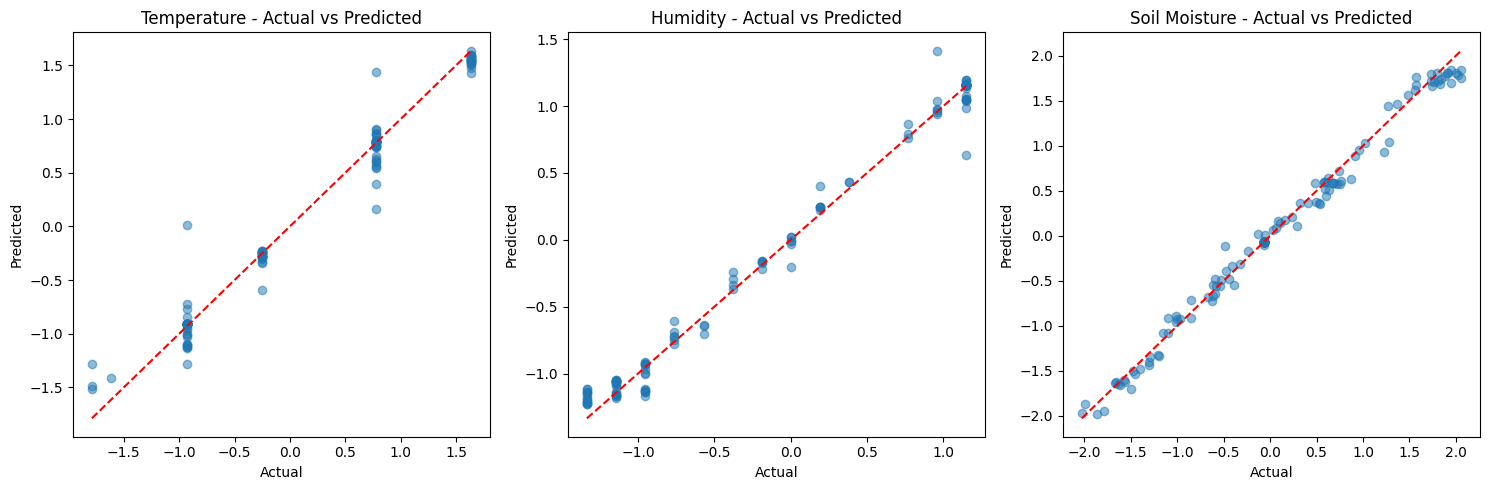


Temperature Accuracy (±5%): 54.23%

Humidity Accuracy (±5%): 49.30%

Soil Moisture Accuracy (±5%): 49.30%

Overall Model Accuracy (±5%): 50.94%


In [29]:
# Plot actual vs predicted values
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    plt.scatter(y_test[:, i], y_pred[:, i], alpha=0.5)
    plt.plot([y_test[:, i].min(), y_test[:, i].max()], 
             [y_test[:, i].min(), y_test[:, i].max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{feature} - Actual vs Predicted')
plt.tight_layout()
plt.show()

# Calculate accuracy within ±5% tolerance
tolerance = 0.05  # 5% tolerance
accuracies = {}

for i, feature in enumerate(features):  
    actual = y_test[:, i]
    predicted = y_pred[:, i]
    within_tolerance = np.abs((predicted - actual) / actual) <= tolerance
    accuracy = np.mean(within_tolerance) * 100
    accuracies[feature] = accuracy
    print(f"\n{feature} Accuracy (±5%): {accuracy:.2f}%")

# Calculate overall accuracy
overall_accuracy = np.mean(list(accuracies.values()))
print(f"\nOverall Model Accuracy (±5%): {overall_accuracy:.2f}%")


In [30]:
# Define the representative dataset generator for quantization
def representative_data_gen():
    for i in range(100):
        yield [X_train[i:i+1].astype(np.float32)]  # Use training data as representative data

# Convert the model to TensorFlow Lite with INT8 quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

# Convert the model
tflite_model = converter.convert()

# Save the quantized model
with open("nhung_model_tf.tflite", "wb") as f:
    f.write(tflite_model)

print("Model successfully converted to INT8!")

INFO:tensorflow:Assets written to: C:\Users\84946\AppData\Local\Temp\tmpdhnlyqdt\assets


INFO:tensorflow:Assets written to: C:\Users\84946\AppData\Local\Temp\tmpdhnlyqdt\assets


Saved artifact at 'C:\Users\84946\AppData\Local\Temp\tmpdhnlyqdt'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 3, 3), dtype=tf.float32, name='keras_tensor_7')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2079324905040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2079324909840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2079324910608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2079324909072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2079324910416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2079324904848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2079324910032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2079324913104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2079324912336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2079324911760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2079324910

c:\Users\84946\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\lite\python\convert.py:997: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


In [31]:
# Function: Convert some hex value into an array for C programming (ESP32-compatible)
def hex_to_c_array(hex_data, var_name):
    c_str = ''

    # Create header guard
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += '#define ' + var_name.upper() + '_H\n\n'
    c_str += '#include <pgmspace.h>\n\n'  # Bắt buộc để dùng PROGMEM trên ESP32

    # Add array length
    c_str += 'const unsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

    # Declare C variable (with PROGMEM)
    c_str += 'const unsigned char ' + var_name + '[] PROGMEM = {\n '

    # Convert hex data to string
    hex_array = []
    for i, val in enumerate(hex_data):
        hex_str = format(val, '#04x')  # Convert to hex
        if (i + 1) < len(hex_data):
            hex_str += ','

        # Add newline every 12 values for better formatting
        if (i + 1) % 12 == 0:
            hex_str += '\n '
        hex_array.append(hex_str)

    # Add closing brace
    c_str += ' '.join(hex_array) + '\n};\n\n'

    # Close out header guard
    c_str += '#endif // ' + var_name.upper() + '_H\n'

    return c_str




In [32]:
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))